In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')
scaler = StandardScaler()
reg = LinearRegression()
reg_pipe = make_pipeline(scaler, reg)
import matplotlib.pyplot as plt
import missingno as miss
import math

In [2]:
x = 105
y = 33
big = max(x,y)
small = min(x,y)

In [3]:
output = []
quotient = math.floor(big/small)
output.append(quotient)

In [4]:
new_small = big % small
big = small
small = new_small

In [5]:
def continued_fraction(x,y,length_tolerance):
    output = []
    big = max(x,y)
    small = min(x,y)
    
    while small > 0 and len(output) < length_tolerance:
        quotient = math.floor(big/small)
        output.append(quotient)
        new_small = big % small
        big = small
        small = new_small
    return(output)

In [6]:
print(continued_fraction(105,33,10))

[3, 5, 2]


In [7]:
def get_number(continued_fraction):
    index = -1
    number = continued_fraction[index]
    
    while abs(index) < len(continued_fraction):
        next = continued_fraction[index - 1]
        number = 1/number + next
        index -= 1
    return(number)

In [8]:
x = 1.4142135623730951
output = []
first_term = int(x)
leftover = x - int(x)
output.append(first_term)

In [9]:
next_term = math.floor(1/leftover)
leftover = 1/leftover - next_term
output.append(next_term)

In [10]:
def continued_fraction_decimal(x,error_tolerance,length_tolerance):
    output = []
    first_term = int(x)
    leftover = x - int(x)
    output.append(first_term)
    error = leftover
    while error > error_tolerance and len(output) <length_tolerance:
        next_term = math.floor(1/leftover)
        leftover = 1/leftover - next_term
        output.append(next_term)
        error = abs(get_number(output) - x)
    return(output)    
    

In [11]:
print(continued_fraction_decimal(1.4142135623730951,0.00001,100))

[1, 2, 2, 2, 2, 2, 2, 2]


In [12]:
def square_root(x,y,error_tolerance):
    our_error = error_tolerance * 2
    while(our_error > error_tolerance):
        z = x/y
        y = (y + z)/2
        our_error = y**2 - x
    return y

In [13]:
print(square_root(5,1,.000000000000001))

2.23606797749979


In [14]:
print(math.sqrt(5))

2.23606797749979


In [15]:
def next_random(previous,n1,n2,n3):
    the_next = (previous * n1 + n2) % n3
    return(the_next)

In [16]:
def list_random(n1,n2,n3):
    output = [1]
    while len(output) <=n3:
        output.append(next_random(output[len(output) - 1],n1,n2,n3))
    return(output)

In [17]:
list_random(29,23,32)

[1,
 20,
 27,
 6,
 5,
 8,
 31,
 26,
 9,
 28,
 3,
 14,
 13,
 16,
 7,
 2,
 17,
 4,
 11,
 22,
 21,
 24,
 15,
 10,
 25,
 12,
 19,
 30,
 29,
 0,
 23,
 18,
 1]

In [18]:
list_random(1,2,24)

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 1]

In [19]:
def overlapping_sums(the_list,sum_length):
    length_of_list = len(the_list)
    the_list.extend(the_list)
    output = []
    for n in range(0,length_of_list):
        output.append(sum(the_list[n:(n + sum_length)]))
    return(output)

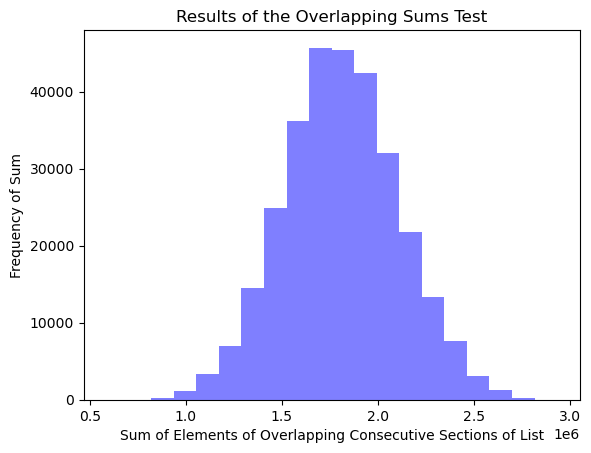

In [20]:
overlap = overlapping_sums(list_random(211111,111112,300007),12)
plt.hist(overlap, 20, facecolor = 'blue', alpha = 0.5)
plt.title('Results of the Overlapping Sums Test')
plt.xlabel('Sum of Elements of Overlapping Consecutive Sections of List')
plt.ylabel('Frequency of Sum')
plt.show()